<a href="https://colab.research.google.com/github/nikhitarao/nikhitarao_projects/blob/Obesity-Risk/Obesity_Risk_PGS_Nikhita_Rao-%20V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'playground-series-s4e2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F68479%2F7609535%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240409%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240409T104214Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd1388ed2579707142479bc8e68b4ee2da88d1e50b70eae7834122600ea6295c12caae4a8d62da702514e5c9863d6e68538414d0fd60981957a13b62717357c0daa88129ce8562a19429ed909768b5f4c197d3615da088a8fb156abfd0bea5955d605d574d1f89b4f12421498d988d14a0bd45ca12d140463f2e8a1626aeae1ee06d003f41ca535287b1eb360141f07d9b0b4961e117b6a10f11b7c06b109092d55e57c3c77bb3d22dc67c5d7e5fc58f9b49ecf47c8eaaee8a96662352ac0b3619e2cd9cce629df55a7873841fd09bebf3900b575f5d9aa82e12d63d30617db9600453cfeb7a70c057d5d61d0d70269007b09cfed2a0ae28580b95e345c525728'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 939479 bytes downloaded
Downloaded and uncompressed: playground-series-s4e2
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from datetime import datetime
from IPython.display import display, HTML
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
train_data = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
train_data

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [4]:
train_data.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
#Function to find the missing values in a dataset

def missing_values(train_data):
    # Initialize an empty DataFrame with specific column names
    missing_data = pd.DataFrame(columns=['Column Name', 'Missing Values', 'Percentage of Missing Values'])

    # Iterate over columns in the dataset
    for column in train_data.columns:
        # Count unique values
        numerator = train_data[column].isna().sum()
        # Total number of entries
        denominator = train_data.shape[0]
        # Calculate the percentage of unique values
        perc_values = (numerator / denominator) * 100
        # Create a temporary DataFrame for the current row
        temp_df = pd.DataFrame({'Column Name': [column],
                                'Missing Values': [numerator],
                                'Percentage of Missing Values': [perc_values]})
        # Concatenate the temporary DataFrame with the main DataFrame
        missing_data = pd.concat([missing_data, temp_df], ignore_index=True)

    return missing_data

In [6]:
missing_values(train_data)

,Column Name,Missing Values,Percentage of Missing Values
0,id,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Height,0,0.0
4,Weight,0,0.0
5,family_history_with_overweight,0,0.0
6,FAVC,0,0.0
7,FCVC,0,0.0
8,NCP,0,0.0
9,CAEC,0,0.0


In [7]:
#Function to find the unique values in a dataset

def unique_values(train_data):
    # Initialize an empty DataFrame with specific column names
    unique_data = pd.DataFrame(columns=['Column Name', 'Unique Values', 'Percentage of Unique Values'])

    # Iterate over columns in the dataset
    for column in train_data.columns:
        # Count unique values
        numerator = train_data[column].nunique()
        # Total number of entries
        denominator = train_data.shape[0]
        # Calculate the percentage of unique values
        perc_values = (numerator / denominator) * 100
        # Create a temporary DataFrame for the current row
        temp_df = pd.DataFrame({'Column Name': [column],
                                'Unique Values': [numerator],
                                'Percentage of Unique Values': [perc_values]})
        # Concatenate the temporary DataFrame with the main DataFrame
        unique_data = pd.concat([unique_data, temp_df], ignore_index=True)

    return unique_data

In [8]:
unique_values(train_data)

,Column Name,Unique Values,Percentage of Unique Values
0,id,20758,100.000000
1,Gender,2,0.009635
2,Age,1703,8.204066
3,Height,1833,8.830330
4,Weight,1979,9.533674
5,family_history_with_overweight,2,0.009635
6,FAVC,2,0.009635
7,FCVC,934,4.499470
8,NCP,689,3.319202
9,CAEC,4,0.019270


In [9]:
#Find the unique values in the columns with low cardinality
print("Gender has these unique values: ", train_data['Gender'].unique())
print("Family History has these unique values: ",train_data['family_history_with_overweight'].unique())
print("FAVC has these unique values: ",train_data['FAVC'].unique())
print("CAEC has these unique values: ",train_data['CAEC'].unique())
print("SMOKE has these unique values: ",train_data['SMOKE'].unique())
print("SCC has these unique values: ",train_data['SCC'].unique())
print("CALC has these unique values: ",train_data['CALC'].unique())
print("MTRANS has these unique values: ",train_data['MTRANS'].unique())
print("NObeyesdad has these unique values: ",train_data['NObeyesdad'].unique())

Gender has these unique values:  ['Male' 'Female']
Family History has these unique values:  ['yes' 'no']
FAVC has these unique values:  ['yes' 'no']
CAEC has these unique values:  ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE has these unique values:  ['no' 'yes']
SCC has these unique values:  ['no' 'yes']
CALC has these unique values:  ['Sometimes' 'no' 'Frequently']
MTRANS has these unique values:  ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad has these unique values:  ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


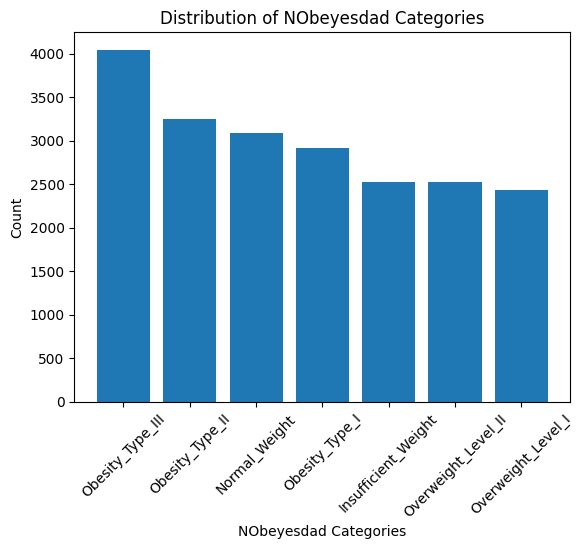

In [10]:
#Let's check the class imbalance with regards to Target Variable- NObeyesdad

# Counting the occurrences of each unique value in the 'NObeyesdad' column
value_counts = train_data['NObeyesdad'].value_counts()
# Creating the bar plot
plt.bar(value_counts.index, value_counts.values)
# Setting the x-axis label
plt.xlabel('NObeyesdad Categories')
# Setting the y-axis label
plt.ylabel('Count')
# Optional: Adding a title to the plot
plt.title('Distribution of NObeyesdad Categories')
# Displaying the plot
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability, if needed
plt.show()

In [11]:
#Let's check the class imbalance of Gender with regards to Target Variable- NObeyesdad

def class_imbalance(train_data):
    categorical_columns = train_data.select_dtypes(include='object').columns

    for column in categorical_columns:
        grouped_data = train_data.groupby(['NObeyesdad', column]).size().unstack(fill_value=0)
        # Plotting
        grouped_data.plot(kind='bar', stacked=True)
        plt.xlabel('NObeyesdad Categories')
        plt.ylabel('Count')
        plt.title(f'Distribution of {column} within NObeyesdad Categories')
        plt.xticks(rotation=45)
        plt.legend(title=column)
        plt.show()
    print("Plots done.")

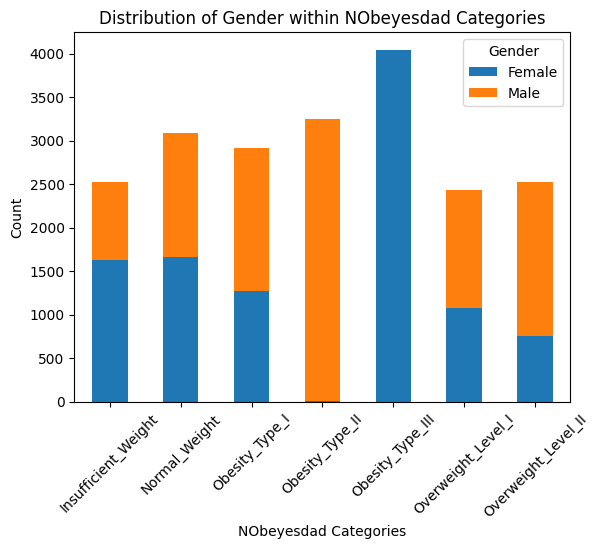

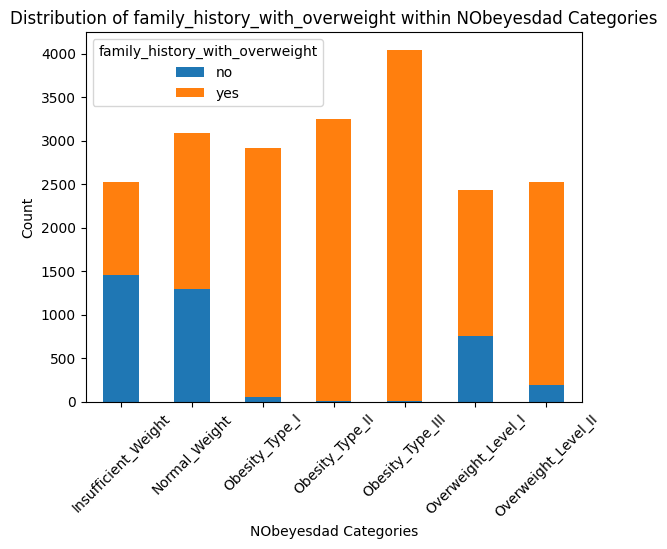

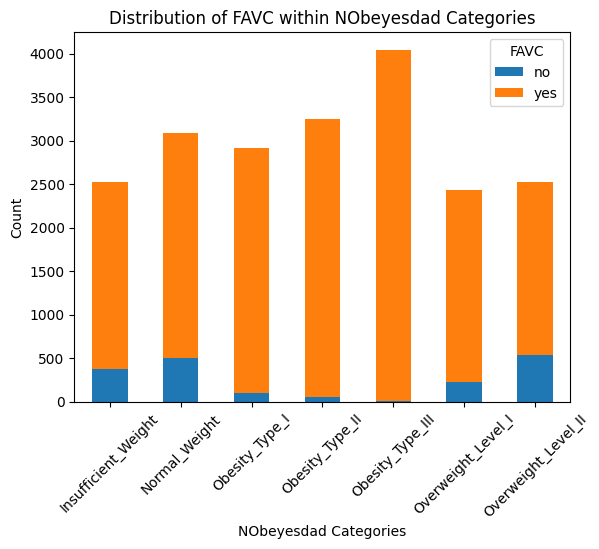

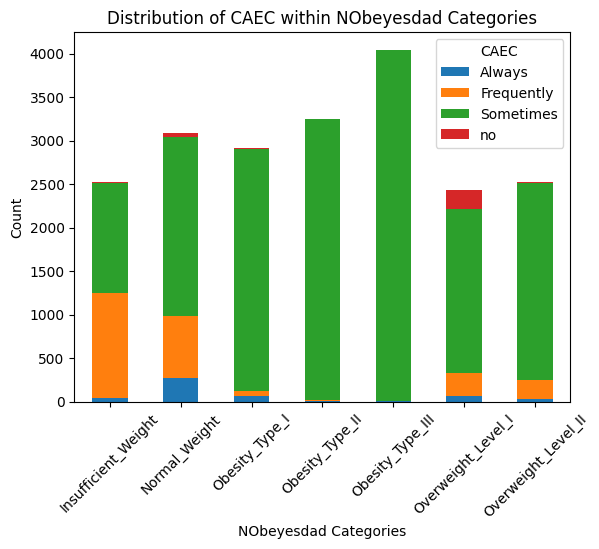

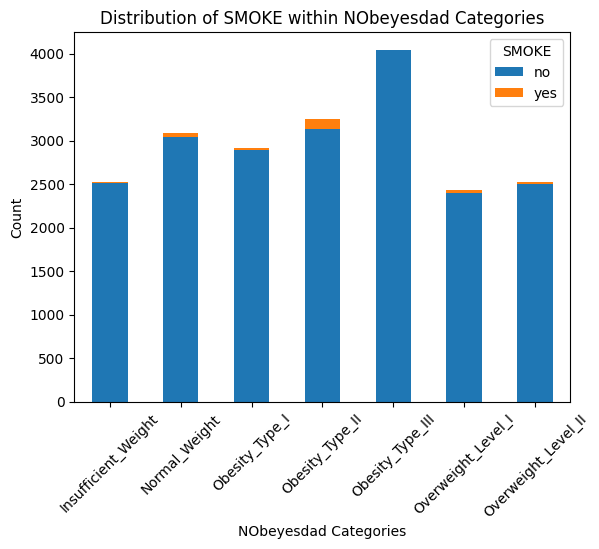

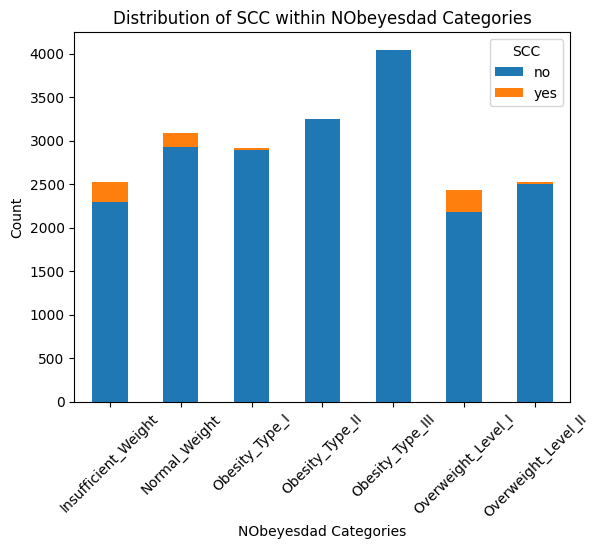

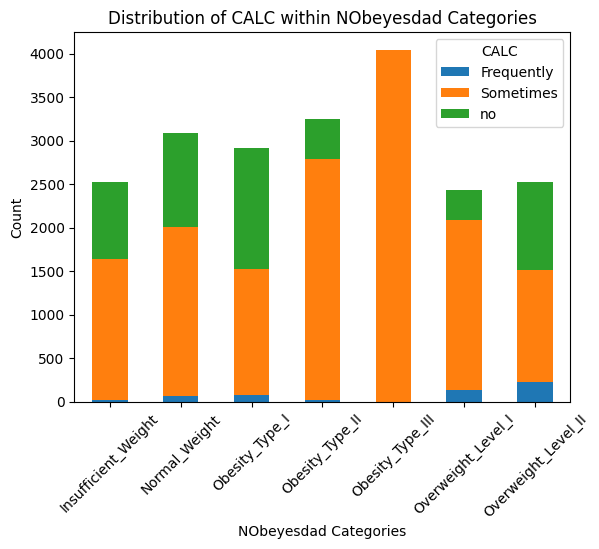

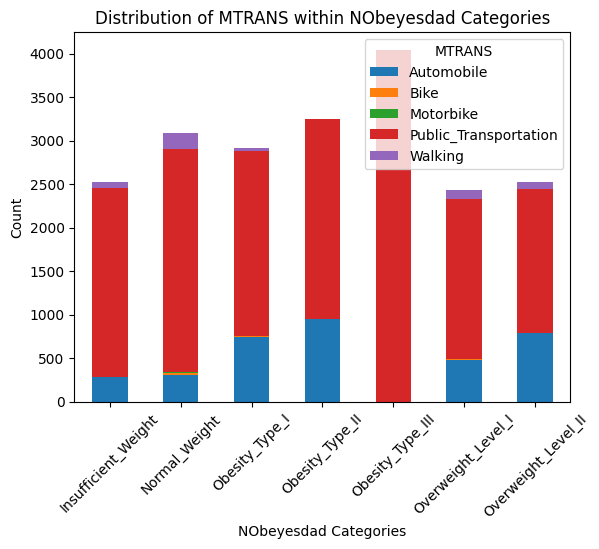

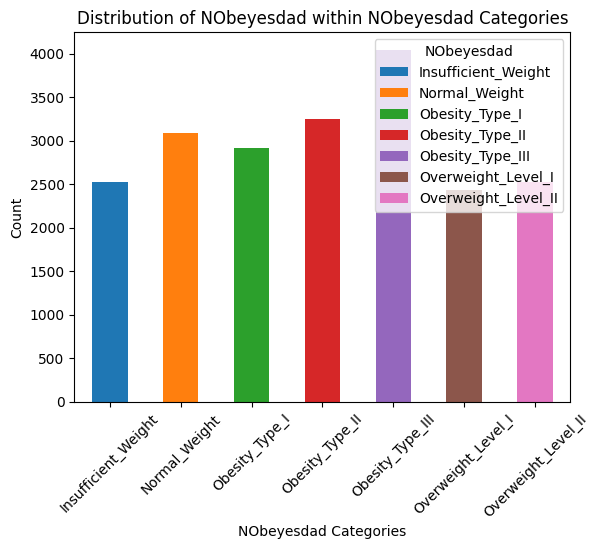

Plots done.


In [12]:
class_imbalance(train_data)

In [13]:
# Let's find out the range of numerical columns

def numerical_columns(train_data):
    numerical_columns = train_data.select_dtypes(include=[np.number]).columns

    for column in numerical_columns:
        column_max = train_data[column].max()
        column_min = train_data[column].min()
        column_range = column_max - column_min
        print(f'Column {column} has max value of {column_max} and min value of {column_min} with range of {column_range}.')

        # Plotting
        plt.hist(train_data[column])
        plt.xlabel(column)  # Simplified
        plt.ylabel('Count')
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.legend([column])  # Changed to list format to avoid error
        plt.show()
    print("Plots done.")

Column id has max value of 20757 and min value of 0 with range of 20757.


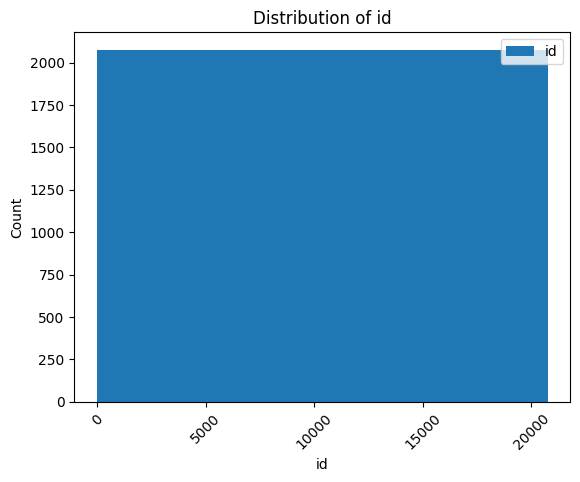

Column Age has max value of 61.0 and min value of 14.0 with range of 47.0.


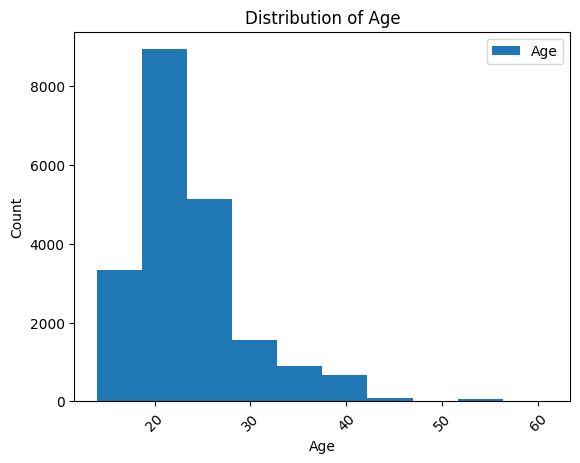

Column Height has max value of 1.975663 and min value of 1.45 with range of 0.525663.


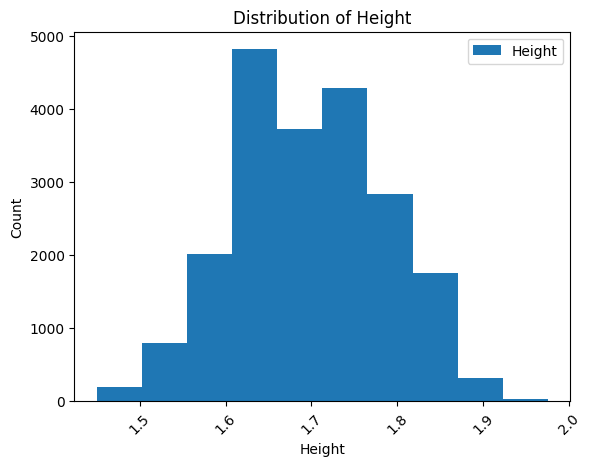

Column Weight has max value of 165.057269 and min value of 39.0 with range of 126.05726899999999.


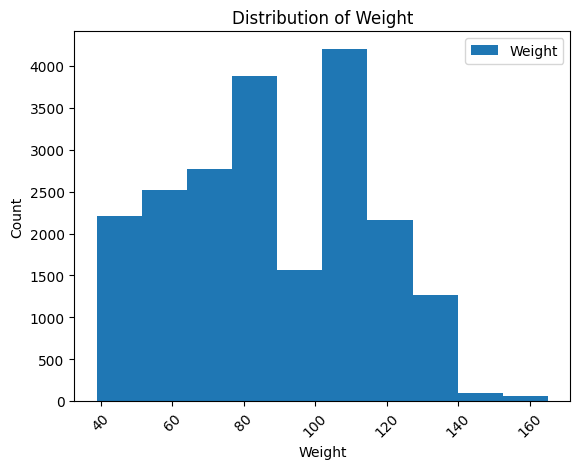

Column FCVC has max value of 3.0 and min value of 1.0 with range of 2.0.


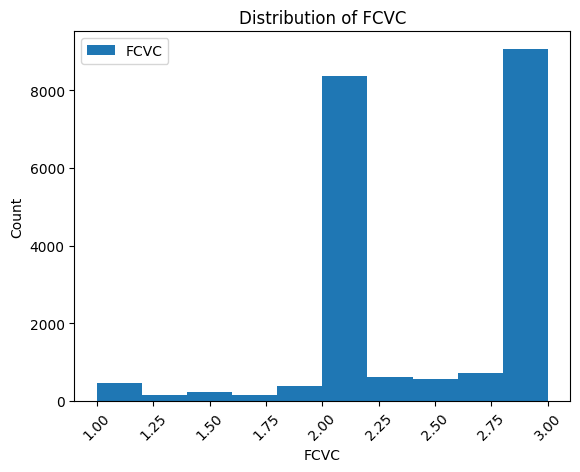

Column NCP has max value of 4.0 and min value of 1.0 with range of 3.0.


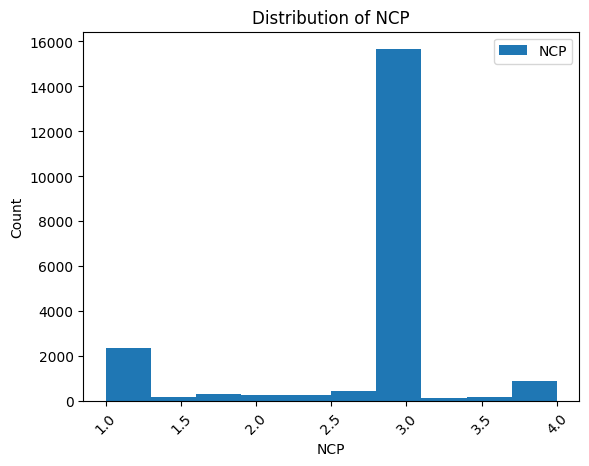

Column CH2O has max value of 3.0 and min value of 1.0 with range of 2.0.


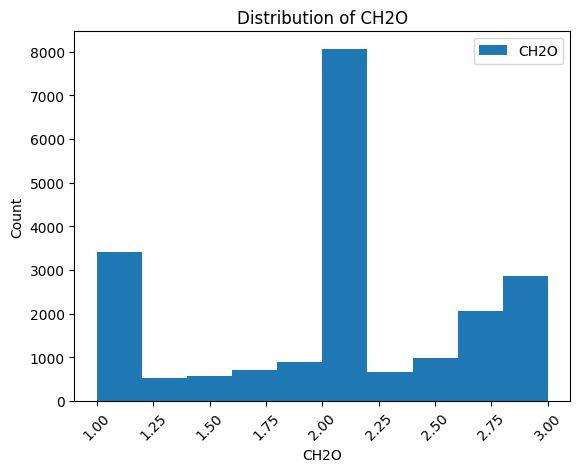

Column FAF has max value of 3.0 and min value of 0.0 with range of 3.0.


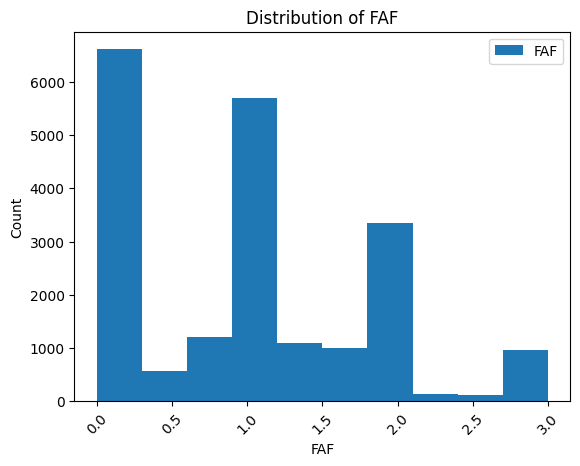

Column TUE has max value of 2.0 and min value of 0.0 with range of 2.0.


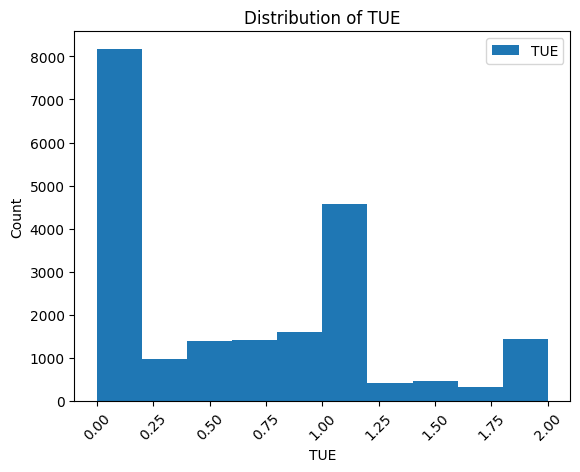

Plots done.


In [14]:
numerical_columns(train_data)

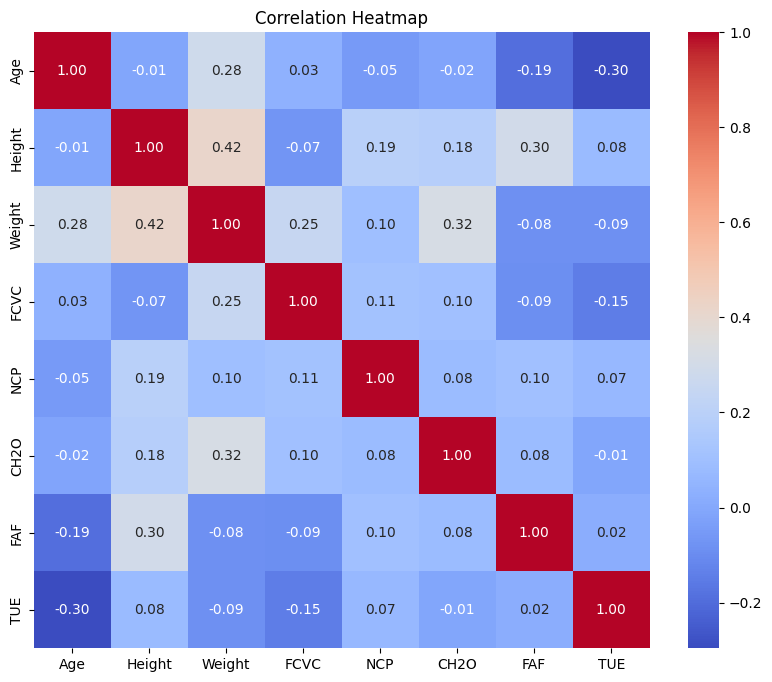

In [15]:
# Let's plot the correlation matrix
corr_data= train_data.drop(['id'], axis=1)
corr_data= corr_data.select_dtypes(include=[np.number])
corr = corr_data.corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
train_data_id = train_data['id']
train_data_target= train_data['NObeyesdad']
train_data_features= train_data.drop(['id','NObeyesdad'], axis=1)
train_data_features

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [17]:
#Encoding of categorical variables
categorical_cols = train_data_features.select_dtypes(include=['object']).columns

# Apply one-hot encoding
train_data_features_encoded = pd.get_dummies(train_data_features, columns=categorical_cols)

train_data_features_encoded

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,True,False,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,True,False,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,False,True,True,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,False,False,False,True,False
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True,True,False,False,False,False


In [18]:
# Convert specific boolean columns to int
columns_to_convert = train_data_features_encoded.select_dtypes(include=['bool']).columns
train_data_features_encoded[columns_to_convert] = train_data_features_encoded[columns_to_convert].astype(int)
train_data_features_encoded

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0


In [19]:
# Let's find out the outliers of the columns

def numerical_columns(train_data_features_encoded):
    numerical_cols = ['Age','Height','Weight', 'FCVC','NCP','CH2O','FAF','TUE']

    for column in numerical_cols:
        # Plotting
        plt.figure(figsize=(5, 3))  # Adjust figure size as needed
        plt.boxplot(train_data_features_encoded[column])
        plt.title(f'Distribution of {column}')
        plt.xticks([1], [column])  # Set x-ticks to the column name
        plt.ylabel('Value')
        plt.grid(True)  # Optionally add a grid for better readability
        plt.show()

    print("Plots done.")

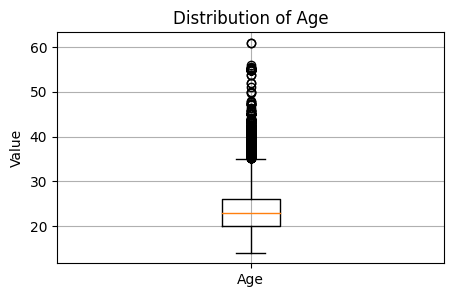

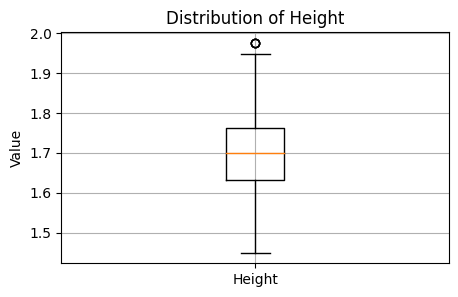

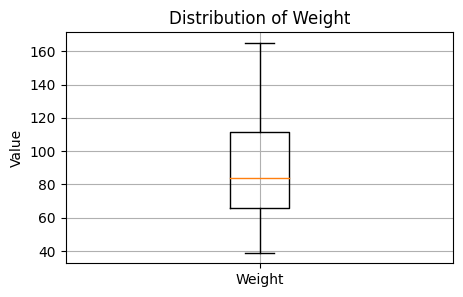

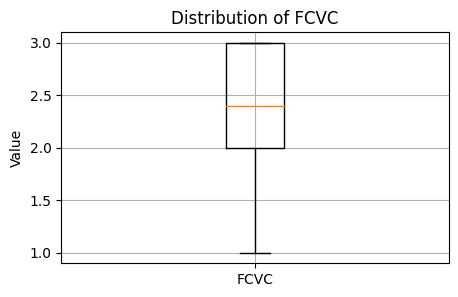

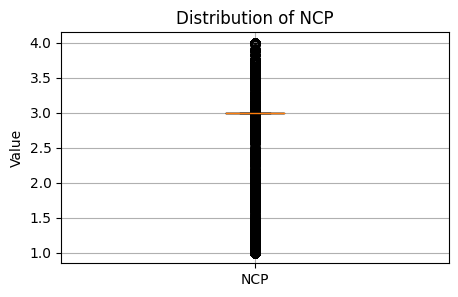

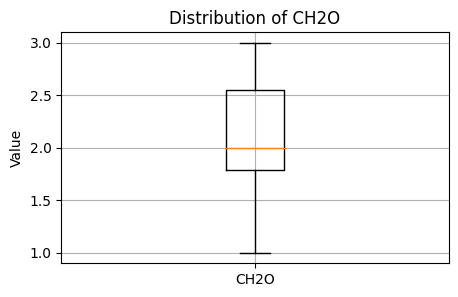

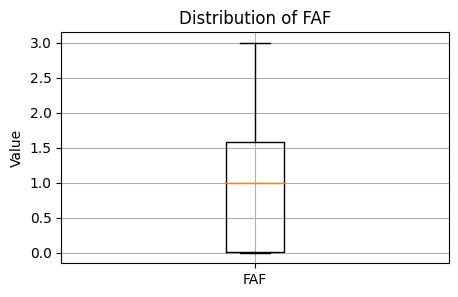

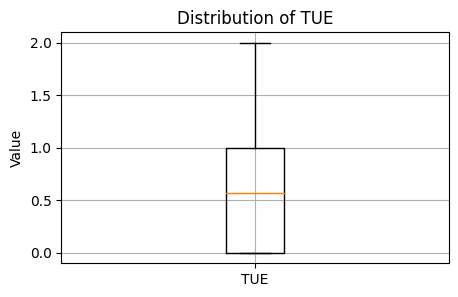

Plots done.


In [20]:
numerical_columns(train_data_features_encoded)

In [21]:
#Scaling all columns including dummy variables using Robust Scaler

from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Select numerical features to scale
features_to_scale = train_data_features_encoded.select_dtypes(include=[np.number]).columns

# Scale the features
td_all_scaled = train_data_features_encoded.copy()  # Create a copy to keep the original data intact
td_all_scaled[features_to_scale] = scaler.fit_transform(td_all_scaled[features_to_scale])
td_all_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.271266,-0.000015,-0.052520,-0.393837,-0.016703,1.007891,-0.633155,0.402586,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.802569,-1.068449,-0.593521,-0.393837,0.000000,0.000000,0.000000,0.426113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,-1.0,0.0
2,-0.802569,0.087460,-0.743393,-0.513303,-1.588315,-0.118298,-0.084814,1.099697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.310447,0.081889,1.035294,0.606163,0.000000,-0.430229,0.296230,0.206312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.470944,1.634621,0.213444,0.285827,-1.028528,-0.026600,0.612877,0.357834,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.386945,0.508475,0.660567,0.525747,0.000000,0.200383,0.209270,-0.377207,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20754,-0.802569,0.076318,-0.747028,0.606163,1.000000,-1.319966,0.633155,0.426113,-1.0,1.0,1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20755,-0.452398,0.912433,0.471828,0.013980,0.000000,0.000000,0.100064,0.624552,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
20756,1.839589,0.000000,-0.011946,0.277401,-1.028528,0.191181,-0.633155,0.399947,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,-1.0,0.0


In [22]:
#Scaling only numerical columns using Robust Scaler

from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Select numerical features to scale
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Scale the numerical features
scaled_features = scaler.fit_transform(train_data_features_encoded[numerical_cols])

# Reassign the scaled numerical features back to the DataFrame
td_num_scaled = train_data_features_encoded[numerical_cols]
td_num_scaled[numerical_cols] = scaled_features
td_num_scaled

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0.271266,-0.000015,-0.052520,-0.393837,-0.016703,1.007891,-0.633155,0.402586
1,-0.802569,-1.068449,-0.593521,-0.393837,0.000000,0.000000,0.000000,0.426113
2,-0.802569,0.087460,-0.743393,-0.513303,-1.588315,-0.118298,-0.084814,1.099697
3,-0.310447,0.081889,1.035294,0.606163,0.000000,-0.430229,0.296230,0.206312
4,1.470944,1.634621,0.213444,0.285827,-1.028528,-0.026600,0.612877,0.357834
...,...,...,...,...,...,...,...,...
20753,0.386945,0.508475,0.660567,0.525747,0.000000,0.200383,0.209270,-0.377207
20754,-0.802569,0.076318,-0.747028,0.606163,1.000000,-1.319966,0.633155,0.426113
20755,-0.452398,0.912433,0.471828,0.013980,0.000000,0.000000,0.100064,0.624552
20756,1.839589,0.000000,-0.011946,0.277401,-1.028528,0.191181,-0.633155,0.399947


In [23]:
from sklearn.model_selection import train_test_split

X=td_all_scaled
y=train_data_target

# Split the dataset into training and testing sets with stratification
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
X_all_train.shape

(16606, 30)

In [25]:
X_all_test.shape

(4152, 30)

In [26]:
y_all_train.shape

(16606,)

In [27]:
y_all_test.shape

(4152,)

In [28]:
## Support Vector Machine Model- DEFAULT ##

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm_model = SVC(kernel='linear', C=1.0)  # You can change the kernel and regularization parameter

# Train the model
svm_model.fit(X_all_train, y_all_train)

# Predictions on the training set
y_all_train_pred = svm_model.predict(X_all_train)

# Predictions
y_all_test_pred = svm_model.predict(X_all_test)

print("For SVM- Default Model:")

# Evaluation on the test set
print("Test Set Classification Report:")
print(classification_report(y_all_test, y_all_test_pred))
print("Test Set Accuracy Score:", accuracy_score(y_all_test, y_all_test_pred))

# Evaluation on the training set
print("\nTraining Set Classification Report:")
print(classification_report(y_all_train, y_all_train_pred))
print("Training Set Accuracy Score:", accuracy_score(y_all_train, y_all_train_pred))

For SVM- Default Model:
Test Set Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.95      0.92       505
      Normal_Weight       0.88      0.81      0.84       617
     Obesity_Type_I       0.82      0.85      0.83       582
    Obesity_Type_II       0.94      0.97      0.95       650
   Obesity_Type_III       1.00      1.00      1.00       809
 Overweight_Level_I       0.76      0.72      0.74       485
Overweight_Level_II       0.74      0.72      0.73       504

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152

Test Set Accuracy Score: 0.8730732177263969

Training Set Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      0.95      0.91      2018
      Normal_Weight       0.87      0.81      0.84      2465
     

In [29]:
## Support Vector Machine Model- HYPERPARAMETER TUNING ##

from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X_all_train, y_all_train)

print("For SVM- Hyperparameter Tuned Model:")

# Best Parameters and Score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model according to grid search
best_model = grid_search.best_estimator_

# Predictions & Evaluation on the Training Set
y_train_pred = best_model.predict(X_all_train)
print("Training Set Evaluation:")
print("Accuracy:", accuracy_score(y_all_train, y_train_pred))
print("Classification Report:\n", classification_report(y_all_train, y_train_pred))

# Predictions & Evaluation on the Test Set
y_test_pred = best_model.predict(X_all_test)
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_all_test, y_test_pred))
print("Classification Report:\n", classification_report(y_all_test, y_test_pred))

For SVM- Hyperparameter Tuned Model:
Best Parameters: {'C': 10, 'kernel': 'linear'}
Best Score: 0.8683007138453217
Training Set Evaluation:
Accuracy: 0.87076960134891
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.88      0.94      0.91      2018
      Normal_Weight       0.86      0.82      0.84      2465
     Obesity_Type_I       0.84      0.83      0.84      2328
    Obesity_Type_II       0.94      0.96      0.95      2598
   Obesity_Type_III       1.00      1.00      1.00      3237
 Overweight_Level_I       0.75      0.71      0.73      1942
Overweight_Level_II       0.73      0.74      0.73      2018

           accuracy                           0.87     16606
          macro avg       0.86      0.86      0.86     16606
       weighted avg       0.87      0.87      0.87     16606

Test Set Evaluation:
Accuracy: 0.875
Classification Report:
                      precision    recall  f1-score   support

Insufficient

In [30]:
## Neural Networks - DEFAULT MODEL ##

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming y_all_train and y_all_test are your target variables

# One-hot encode the target variables
label_encoder = LabelEncoder()
y_all_train_encoded = label_encoder.fit_transform(y_all_train)
y_all_test_encoded = label_encoder.transform(y_all_test)
y_all_train_categorical = to_categorical(y_all_train_encoded)
y_all_test_categorical = to_categorical(y_all_test_encoded)

# Model Building
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_all_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])

# Model Compilation
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training
history = model.fit(X_all_train, y_all_train_categorical, epochs=10, validation_split=0.2, verbose=2)

print("For Neural Network- Default Model:")

# Model Evaluation on the Training Set
train_loss, train_acc = model.evaluate(X_all_train, y_all_train_categorical, verbose=0)
print('\nTraining Set Accuracy:', train_acc)

# Model Evaluation on the Test Set
test_loss, test_acc = model.evaluate(X_all_test, y_all_test_categorical, verbose=0)
print('\nTest Set Accuracy:', test_acc)

# Predictions and Detailed Evaluation on the Training Set
y_all_train_pred = model.predict(X_all_train)
y_all_train_pred = label_encoder.inverse_transform(y_all_train_pred.argmax(axis=-1)) # Inverse transform from one-hot encoding

print("\nTraining Set Detailed Evaluation:")
print(classification_report(y_all_train, y_all_train_pred))
print("Training Set Confusion Matrix:\n", confusion_matrix(y_all_train, y_all_train_pred))

# Predictions and Detailed Evaluation on the Test Set
y_all_test_pred = model.predict(X_all_test)
y_all_test_pred = label_encoder.inverse_transform(y_all_test_pred.argmax(axis=-1)) # Inverse transform from one-hot encoding

print("\nTest Set Detailed Evaluation:")
print(classification_report(y_all_test, y_all_test_pred))
print("Test Set Confusion Matrix:\n", confusion_matrix(y_all_test, y_all_test_pred))

Epoch 1/10
416/416 - 2s - loss: 1.0029 - accuracy: 0.6366 - val_loss: 0.6004 - val_accuracy: 0.7766 - 2s/epoch - 4ms/step
Epoch 2/10
416/416 - 1s - loss: 0.5060 - accuracy: 0.8160 - val_loss: 0.4467 - val_accuracy: 0.8368 - 599ms/epoch - 1ms/step
Epoch 3/10
416/416 - 1s - loss: 0.4205 - accuracy: 0.8517 - val_loss: 0.4178 - val_accuracy: 0.8456 - 573ms/epoch - 1ms/step
Epoch 4/10
416/416 - 1s - loss: 0.3933 - accuracy: 0.8630 - val_loss: 0.4028 - val_accuracy: 0.8570 - 570ms/epoch - 1ms/step
Epoch 5/10
416/416 - 1s - loss: 0.3795 - accuracy: 0.8676 - val_loss: 0.3824 - val_accuracy: 0.8618 - 563ms/epoch - 1ms/step
Epoch 6/10
416/416 - 1s - loss: 0.3693 - accuracy: 0.8730 - val_loss: 0.3840 - val_accuracy: 0.8709 - 586ms/epoch - 1ms/step
Epoch 7/10
416/416 - 1s - loss: 0.3651 - accuracy: 0.8755 - val_loss: 0.3979 - val_accuracy: 0.8573 - 632ms/epoch - 2ms/step
Epoch 8/10
416/416 - 1s - loss: 0.3607 - accuracy: 0.8749 - val_loss: 0.3738 - val_accuracy: 0.8688 - 618ms/epoch - 1ms/step
Epo

In [ ]:
## Neural Networks - HYPERPARAMETER TUNED MODEL ##

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data loaded into X_all_train and y_all_train

# One-hot encode the target variables
label_encoder = LabelEncoder()
y_all_train_encoded = label_encoder.fit_transform(y_all_train)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all_train, y_all_train_encoded, test_size=0.2, random_state=42)

# Define the MLP classifier
mlp = MLPClassifier(max_iter=1000)  # max_iter to ensure convergence

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (32,), (64, 32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64],
}

# Perform grid search
grid = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print("For Neural Network- Hyperparameter Tuned Model:")

# Print best parameters and scores
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

# Evaluate on train set
best_model = grid.best_estimator_
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train accuracy: {:.2f}".format(train_accuracy))

# Evaluate on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy: {:.2f}".format(test_accuracy))


In [ ]:
## Logistic Regression - Default Model ##

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_all_train, X_all_test, y_all_train, y_all_test are your pre-scaled and split datasets

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_all_train, y_all_train)

# Make predictions on the training set
y_train_pred = log_reg.predict(X_all_train)

# Make predictions on the test set
y_test_pred = log_reg.predict(X_all_test)

print("For Logistic Regression- Default Model:")

# Evaluate the model on the training set
print("Training Set Evaluation:")
print("Classification Report:")
print(classification_report(y_all_train, y_train_pred))
print("Accuracy Score:", accuracy_score(y_all_train, y_train_pred))

# Evaluate the model on the test set
print("Test Set Evaluation:")
print("Classification Report:")
print(classification_report(y_all_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_all_test, y_test_pred))

In [ ]:
## Logistic Regression - Hyperparameter Tuned Model ##

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_all_train, y_all_train are your pre-scaled training datasets

# Define the model without any specific hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']  # Solvers that support multinomial logistic regression
}

# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_all_train, y_all_train)

print("For Logistic Regression- Hyperparameter Tuned Model:")

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_

# Evaluate the best model on the Training Set
y_train_pred = best_model.predict(X_all_train)  # Predictions on the training set
print("Training Set Evaluation:")
print("Classification Report:")
print(classification_report(y_all_train, y_train_pred))
print("Accuracy Score:", accuracy_score(y_all_train, y_train_pred))

# Evaluate the best model on the Test Set
y_test_pred = best_model.predict(X_all_test)  # Predictions on the test set
print("Test Set Evaluation:")
print("Classification Report:")
print(classification_report(y_all_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_all_test, y_test_pred))